# Part 3  - Explore the Location Data
The dataset contains the 100 most populated metro areas along with the ten most frequently occuring venue categoies from Foursquare.

<table style="width:100%">
    <tr>
        <td style="text-align: left">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Final%20Project%20-%20Get%20FourSquare%20Data.ipynb">&larr; Part 2</a>
            </h2>
        </td>
        <td style="text-align: right">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Cluster%20Metro%20Areas.ipynb">Part 4 &rarr;</a>
            </h2>
        </td>
    </tr>
</table>

In [2]:
#import libraries
import requests
import numpy as np
import pandas as pd
import ibm_boto3
import io

In [3]:
# import plotting libraries
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
#Import Venue dataframe
obj = resource.Object(bucket_name=bucket, key='VenueData.json').get()
df = pd.read_json(io.BytesIO(obj['Body'].read()))
df.sort_index(inplace=True)
df.head()

,Metropolitan,Country,Continent,Latitude,Longitude,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,Tokyo,Japan,Asia,35.682839,139.759455,Café,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Lounge,Garden,French Restaurant,Dessert Shop,Thai Restaurant,Steakhouse
1,Delhi,India,Asia,28.651718,77.221939,Indian Restaurant,Bar,Café,Flea Market,Lounge,Asian Restaurant,Ice Cream Shop,South Indian Restaurant,Portuguese Restaurant,Plaza
2,Mexico City,Mexico,North America,19.432601,-99.133342,Mexican Restaurant,Art Museum,Museum,Arts & Crafts Store,Bar,Ice Cream Shop,Boutique,Bakery,Restaurant,Café
3,São Paulo,Brazil,South America,-23.550651,-46.633382,Brazilian Restaurant,Japanese Restaurant,Café,Bakery,Snack Place,Bookstore,Art Gallery,Chinese Restaurant,Cosmetics Shop,Asian Restaurant
4,Lagos,Nigeria,Africa,6.455057,3.394179,Lounge,African Restaurant,Café,Bar,Pizza Place,Italian Restaurant,Market,Shopping Mall,Art Gallery,Hotel


In [8]:
#Import Venue Count dataframe
obj = resource.Object(bucket_name=bucket, key='VenueCatCount.json').get()
df_cat = pd.read_json(io.BytesIO(obj['Body'].read()))
df_cat.sort_index(inplace=True)
df_cat.head()

,Metro,ATM,Acai House,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Amphitheater,Antique Shop,...,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Yoshoku Restaurant,Zhejiang Restaurant,Zoo Exhibit
0,Ahmedabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alexandria,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ankara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,Atlanta,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Bandung,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Which locations have fewer than 10 venue categoies retured from Foursquare?

In [5]:
#See which rows have na values
df_nan = df[df['Category 10'].isna()]
df_nan

,Metropolitan,Country,Continent,Latitude,Longitude,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
16,Tianjin,China,Asia,39.303262,117.416364,Tour Provider,Bookstore,Italian Restaurant,National Park,Park,None,None,None,None,None
26,Xi'an,China,Asia,35.000074,104.999927,Business Service,Women's Store,None,None,None,None,None,None,None,None
29,Changzhou,China,Asia,31.812986,119.969205,American Restaurant,Chinese Restaurant,Department Store,Electronics Store,History Museum,Italian Restaurant,Shopping Mall,None,None,None
32,Shantou,China,Asia,23.356377,116.677592,Chinese Restaurant,Park,Coffee Shop,Italian Restaurant,None,None,None,None,None,None
43,Zhengzhou,China,Asia,34.759188,113.652408,Shopping Mall,Chinese Restaurant,Electronics Store,German Restaurant,History Museum,Hotel,None,None,None,None
50,Bandung,Indonesia,Asia,-6.934469,107.604954,Museum,Noodle House,Park,Pet Store,Restaurant,None,None,None,None,None
56,Beijing,China,Asia,40.190632,116.412144,Chinese Restaurant,Hot Spring,Museum,Resort,Ski Area,None,None,None,None,None
60,Wenzhou,China,Asia,27.995869,120.691579,Bar,Chinese Restaurant,Coffee Shop,Hotel,Indian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Pizza Place,Plaza,None
63,Nanchang,China,Asia,28.679270,115.888599,Grocery Store,History Museum,Lake,Movie Theater,Pub,Shopping Mall,None,None,None,None
64,Yangon,Myanmar,Asia,17.059434,96.113390,Asian Restaurant,Breakfast Spot,Restaurant,River,None,None,None,None,None,None


### How many of the top 100 metro areas are in each continent?

In [6]:
#Count metro areas by Continent
df1 = pd.DataFrame({'Continent':df.Continent, 'Count':df.Metropolitan})
df1 = df1.groupby(['Continent']).count().sort_values(by=['Count'], ascending=False)

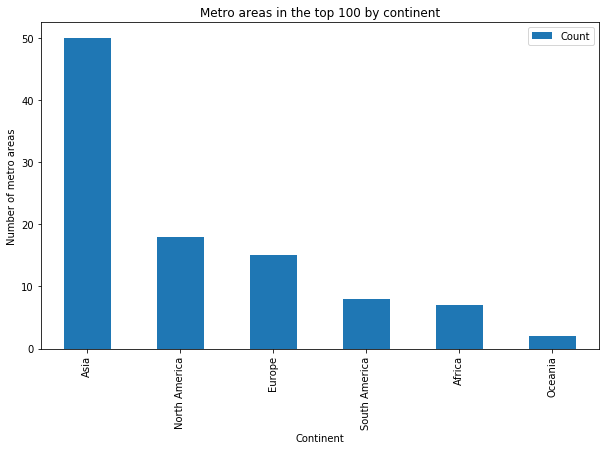

In [7]:
df1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Continent') # add to x-label to the plot
plt.ylabel('Number of metro areas') # add y-label to the plot
plt.title('Metro areas in the top 100 by continent') # add title to the plot
plt.show()

### How many of the top metro areas are in each country?
Only those countries with more than 1 metro area are included in the plot

In [8]:
#Count metro areas by country
df2 = pd.DataFrame({'Country':df.Country, 'Count':df.Metropolitan})
df2 = df2.groupby(['Country']).count().sort_values(by=['Count'], ascending=False)
df2

,Count
Country,
China,21
United States,14
India,9
Germany,6
Mexico,3
Brazil,3
Indonesia,3
Japan,3
South Korea,2


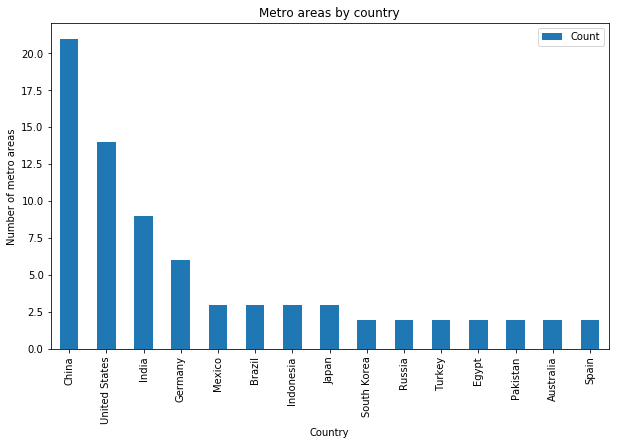

In [9]:
df2[df2['Count']>1].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Country') # add to x-label to the plot
plt.ylabel('Number of metro areas') # add y-label to the plot
plt.title('Metro areas by country') # add title to the plot
plt.show()

### Category 1 contains the venue category that was returned most often for each metro area
### Which venue types occured most often for Category 1?
Only categories that occured at least twice are shown.

In [10]:
#Count #1 top venue category
df3 = pd.DataFrame({'Top Venue':df['Category 1'], 'Count':df.Metropolitan})
df3 = df3.groupby(['Top Venue']).count().sort_values(by=['Count'], ascending=False)
df3 = df3[df3['Count']>1]
df3

,Count
Top Venue,
Café,14
Coffee Shop,10
Shopping Mall,9
Indian Restaurant,8
Bar,7
Chinese Restaurant,7
Mexican Restaurant,3
Park,3
Restaurant,2


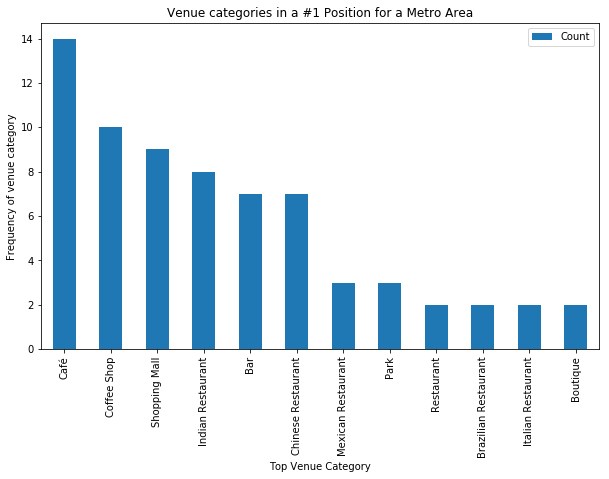

In [11]:
df3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Top Venue Category') # add to x-label to the plot
plt.ylabel('Frequency of venue category') # add y-label to the plot
plt.title('Venue categories in a #1 Position for a Metro Area') # add title to the plot
plt.show()

###  How many times does each venue category occur?
Only those that occured 50 times or more are shown.

In [28]:
df4 = pd.DataFrame(df_cat.sum()).drop('Metro').sort_values(0,ascending=False).rename(columns={0:'Count'})
df5 = df4[df4['Count']>=50]
df5

,Count
Café,397
Coffee Shop,264
Indian Restaurant,179
Bar,174
Italian Restaurant,174
Restaurant,167
Plaza,144
Bakery,140
Park,138
Shopping Mall,134


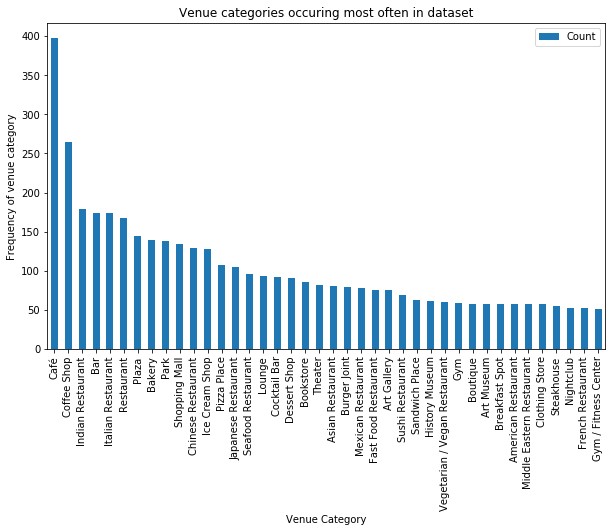

In [22]:
df5.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Frequency of venue category') # add y-label to the plot
plt.title('Venue categories occuring most often in dataset') # add title to the plot
plt.show()

### Look at how many categoies occured once, twice, three times, etc.

In [39]:
dfcc = pd.DataFrame({'Number of Occurances':df4['Count'], 'Count of venue categories':df4.iloc[:,0]})

dfcc = dfcc.groupby(dfcc['Number of Occurances']).count().sort_values(by=['Number of Occurances'])
dfcc

,Count of venue categories
Number of Occurances,
1,88
2,43
3,44
4,16
5,14
6,16
7,12
8,11
9,11


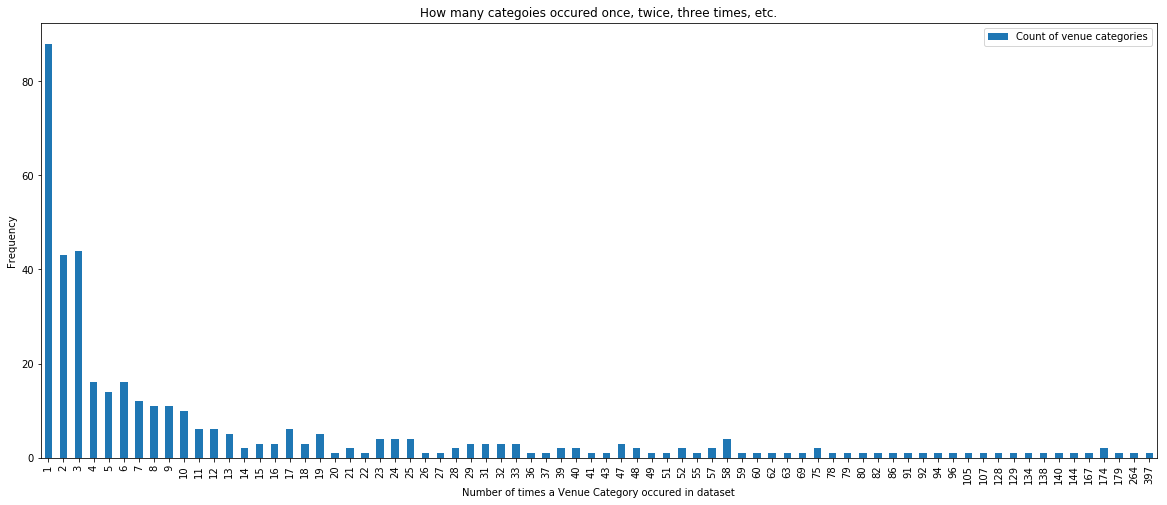

In [38]:
dfcc.plot(kind='bar', figsize=(20, 8))

plt.xlabel('Number of times a Venue Category occured in dataset') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('How many categoies occured once, twice, three times, etc.') # add title to the plot
plt.show()

### Which categoies only occur once?
Grouping or renaming some of these may improve the model.

In [40]:
with pd.option_context('display.max_rows', None):
    display(df4[df4['Count']==1])

,Count
Maharashtrian Restaurant,1
Tonkatsu Restaurant,1
Tiki Bar,1
Tibetan Restaurant,1
Bengali Restaurant,1
Reservoir,1
Bike Rental / Bike Share,1
Board Shop,1
Paella Restaurant,1
Tex-Mex Restaurant,1


<table style="width:100%">
    <tr>
        <td style="text-align: left">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Final%20Project%20-%20Get%20FourSquare%20Data.ipynb">&larr; Part 2</a>
            </h2>
        </td>
        <td style="text-align: right">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Cluster%20Metro%20Areas.ipynb">Part 4 &rarr;</a>
            </h2>
        </td>
    </tr>
</table>